### Pregunta 1
Cargar la tabla de la segunda hoja como un DataFrame de Pandas y realizar las siguientes actividades:

1.1 ¿Cuantos clientes distintos se contabilizan en los datos? ¿Cuantos tipos distintos de ofertas de vinos se pusieron a disposici ́on de los clientes?

In [1]:
#Librerias
import pandas as pd
#Data hoja 'Transactions'
df_transactions= pd.read_excel('desafio3_1.xlsx',  sheet_name='Transactions')
df_transactions

,Customer Last Name,Offer #
0,Smith,2
1,Smith,24
2,Johnson,17
3,Johnson,24
4,Johnson,26
...,...,...
319,Fisher,11
320,Fisher,22
321,Fisher,28
322,Fisher,30


In [2]:
#n° de clientes disintos 
n_customers = sorted(set(df_transactions['Customer Last Name']))
print(f'Hay {len(n_customers)} clientes distintos')
#n° de ofertas
n_offers = set(df_transactions['Offer #'])
print(f'Hay {len(n_offers)} ofertas distintas')

Hay 100 clientes distintos
Hay 32 ofertas distintas


1.2 Construir una matriz de componentes binarias (1′s y 0′s) que describa a los clientes y las ofertas de vino que compraron. En este caso, las filas de la matriz corresponden a los clientes y las columnas a las ofertas de vinos.
Cada valor igual a 1 en la matriz significa que el cliente adquirio la oferta de vinos correspondiente.

In [3]:
df_transactions['Customer Last Name'][1]

'Smith'

In [4]:
#Librrias
import numpy as np
#Matriz de zeros (100x32)
df_bin = np.zeros((len(n_customers),len(n_offers)), dtype=int)
#Indices y columas
df_bin = pd.DataFrame(df_bin, index=n_customers, columns=n_offers)
#Asignacion de 1
for i in range(len(df_transactions)):
    a = df_transactions['Offer #'][i]
    b = df_transactions['Customer Last Name'][i]
    df_bin[a][b] = 1
df_bin

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
Adams,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
Allen,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
Anderson,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
Bailey,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Baker,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Williams,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Wilson,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
Wood,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
Wright,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


### Pregunta 2

Agrupar a los clientes en base a las compras realizadas. Para esto:

2.1 Correr el algoritmo K-means para agrupar a los clientes (utilizando la matriz obtenida en el item 1.2). Justificar el numero de clusters K utilizado.

c:\Users\Javiera Carrasco\anaconda3\envs\ima539\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


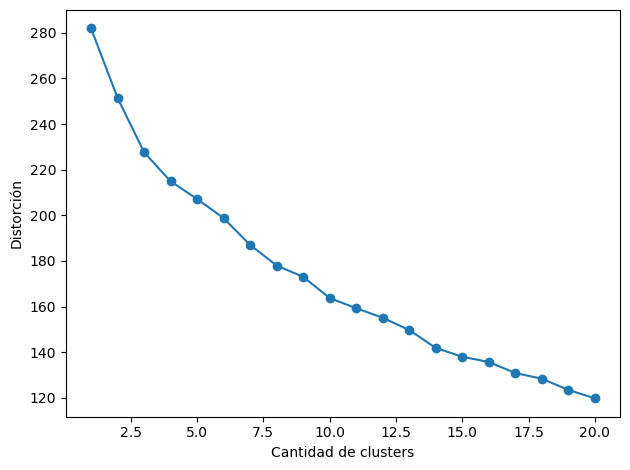

In [5]:
#Librerias
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
#Metodo del codo para numero de clusters
#Para k-means no es necesario estandarizar
'''#Estandarizado
scaler = MinMaxScaler()
x_std = scaler.fit_transform(df_bin.values)'''
distortions = []
for i in range(1, 21):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300,random_state=0)
    km.fit(df_bin)
    distortions.append(km.inertia_)
plt.plot(range(1, 21), distortions, marker='o')
plt.xlabel('Cantidad de clusters')
plt.ylabel('Distorción')
plt.tight_layout()
plt.show()

Al rededor de K=4 la distorcion muestra una importante disminucion, luego desciende en pequeños pasos.

In [6]:
#K-means
km = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, tol=1e-04,random_state=0)
y_km = km.fit_predict(df_bin)
df_clusters = pd.DataFrame(y_km, index= n_customers, columns= ['Clusters'] )
df_clusters

,Clusters
Adams,2
Allen,3
Anderson,1
Bailey,2
Baker,3
...,...
Williams,3
Wilson,2
Wood,3
Wright,0


2.2 Caracterizar los clusters en base a las tres ofertas mas compradas por los clientes de cada cluster, para los resultados entregados por cada algoritmo. Utilizar la primera hoja y las variables mencionadas en el encabezado de
la Tarea para la caracterizacion.

In [7]:
#Librerias
import heapq
import collections

#Agrupamos los clientes por cluster en una lista de dfs
groups = df_clusters.groupby(df_clusters['Clusters'])
dfs = []
#Dataframes de cada cluster
for name, group in groups:
  dfs.append(group)
list_offer = []
for i in range(len(dfs)):
  #Renombrar cada dataframe
  dfs[i].rename(columns={'Clusters': 'Cluster '+str(i)}, inplace=True)
  offers = []
  '''En esta seccion del codigo se crea una lista con 4 listas con las ofertas compradas 
  por cada cliente perteneciente a cada cluster'''
  #Se toma cada trasaccion
  for j in range(len(df_transactions)):
    #Se repite para cada cluster
    for k in range(len(dfs[i])):
      #Se agrega a la lista el numero de la oferta comprado por el cliente 
      if df_transactions['Customer Last Name'][j] == dfs[i].index[k]:
        offers.append(df_transactions['Offer #'][j])
  #Se agrega la lista a otra lista 
  list_offer.append(offers)
#Calculo de frecuencia de ofertas por cluster
for i in range(len(list_offer)):
  #Se contavilizan las ofertas
  a = collections.Counter(list_offer[i])
  #Se crea un cataframe 
  top3_offer = pd.DataFrame.from_dict(a, orient='index', columns=['Count'])
  top3_offer = top3_offer.reset_index()
  top3_offer.columns = ['Offer', 'Frequency']
  #Se ordena la columna 'Frequency' de mayor a menor 
  top3_offer = top3_offer.sort_values('Frequency', ascending=False)
  print('------------------------------------------------------------------')
  print(f'Para el cluster {i} las siguentes ofertas son las mas frecuentes:')
  print(top3_offer.head(3))
      

------------------------------------------------------------------
Para el cluster 0 las siguentes ofertas son las mas frecuentes:
   Offer  Frequency
0      6         11
4     22          7
8      4          7
------------------------------------------------------------------
Para el cluster 1 las siguentes ofertas son las mas frecuentes:
   Offer  Frequency
1     24         12
3     26         12
2     17          7
------------------------------------------------------------------
Para el cluster 2 las siguentes ofertas son las mas frecuentes:
   Offer  Frequency
3      8         17
0      7         16
1     29         16
------------------------------------------------------------------
Para el cluster 3 las siguentes ofertas son las mas frecuentes:
    Offer  Frequency
1      22         13
11     11         12
2      31         12


In [8]:
#Data hoja 'OfferInformation'
df_offerInfo = pd.read_excel('desafio3_1.xlsx', sheet_name='OfferInformation')


In [9]:
'''Caracterizacion cluster 0'''
df_offerInfo.loc[df_offerInfo['Offer #'].isin([6, 22, 4])]

,Offer #,Campaign,Varietal,Minimum Qty (kg),Discount (%),Origin,Past Peak
3,4,February,Champagne,72,48,France,True
5,6,March,Prosecco,144,86,Chile,False
21,22,August,Champagne,72,63,France,False


El cluster 0 se caracteriza por elegir mayormente 72kg de champaña francesa en aproximadamente mitad de precio sin importar la epoca del año. Otra parte del cluster prefiere comprar altas cantidades de producto con un alto descuento.

In [10]:
'''Caracterizacion cluster 1'''
df_offerInfo.loc[df_offerInfo['Offer #'].isin([24, 26, 17])]

,Offer #,Campaign,Varietal,Minimum Qty (kg),Discount (%),Origin,Past Peak
16,17,July,Pinot Noir,12,47,Germany,False
23,24,September,Pinot Noir,6,34,Italy,False
25,26,October,Pinot Noir,144,83,Australia,False


Los compradores del cluster 1 se caracterizan unicamente por comprar Pinot Noir sin importar el origen del producto, eligiendo pocas cantidades con un descuento bajo el 50% o grandes cantidades con un alto descuento. Se puede decir que prefieren comprar en el segundo semestre del año.

In [11]:
'''Caracterizacion cluster 2'''
df_offerInfo.loc[df_offerInfo['Offer #'].isin([8, 7, 29])]

,Offer #,Campaign,Varietal,Minimum Qty (kg),Discount (%),Origin,Past Peak
6,7,March,Prosecco,6,40,Australia,True
7,8,March,Espumante,6,45,South Africa,False
28,29,November,Pinot Grigio,6,87,France,False


Los compradores del cluster 2 se caracterizan por comprar pequeñas cantidades de producto sin importar la variedad ni la procedencia. Ademas 2 de ellos compraron en marzo con descuento al rededor de 40%.

In [12]:
'''Caracterizacion cluster 3'''
df_offerInfo.loc[df_offerInfo['Offer #'].isin([22, 11, 31])]

,Offer #,Campaign,Varietal,Minimum Qty (kg),Discount (%),Origin,Past Peak
10,11,May,Champagne,72,85,France,False
21,22,August,Champagne,72,63,France,False
30,31,December,Champagne,72,89,France,False


Los compradores del cluster 3 se caracterizan por elegir 72kg de champaña de origen frances con un alto descuento (sobre 50%), es decir, prefieren comprar champaña francesa en grandes cantidades con un buen descuento sin inportar la epoca del año.

Por otra parte, la Base de Datos desafio3_2.csv contiene 10 columnas con
informacion sobre precios (en miles de dolares) de automoviles (columna price). Las columnas carat, depth, table, x, y, z representan variables continuas, mientras que las columnas cut, color, clarity representan variables categoricas.

### Pregunta 3
Ajustar un Modelo de Regresion para predecir el precio de los automoviles. Para esto:

3.1 Leer la base de datos y almacenarla como un objeto DataFrame. Mostrar
las estadisticas descriptivas de todas las variables. Transformar las variables categoricas a variables dummies y generar un conjunto (X, y), con
y la variable precio y X la matriz formada por el resto de las variables.
¿Cual es la dimension de X?

In [13]:
#Data
df_data = pd.read_csv("desafio3_2.csv")
df_data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95
...,...,...,...,...,...,...,...,...,...,...
40450,1.34,Ideal,G,VS1,62.7,57.0,10070,7.10,7.04,4.43
40451,2.02,Good,F,SI2,57.1,60.0,12615,8.31,8.25,4.73
40452,1.01,Ideal,H,SI1,62.7,56.0,5457,6.37,6.42,4.01
40453,0.33,Ideal,J,VS1,61.9,54.3,456,4.45,4.47,2.76


In [14]:
#Estadisticas descriptivas
df_data.iloc[:, 1:3] = df_data.iloc[:, 1:3].astype('category')
df_data.describe(include='all')

,carat,cut,color,clarity,depth,table,price,x,y,z
count,40455.000000,40455,40455,40455,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,16220,8455,9749,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797706,NaN,NaN,NaN,61.752841,57.446133,3928.444469,5.729392,5.732819,3.537154
std,0.475544,NaN,NaN,NaN,1.431725,2.233535,3992.416147,1.124453,1.146650,0.697062
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,945.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2397.000000,5.690000,5.710000,3.520000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5331.000000,6.540000,6.540000,4.035000


In [15]:
#Se trasforman las variables categóricas en variables dummies
df_dummies= pd.get_dummies(df_data, columns=['cut', 'color', 'clarity'])
#Variable precio
y = df_dummies['price']
#Matriz son'price'
X = df_dummies.drop('price', axis=1)
#Dismensiones de la matriz X
print(f'Las dimensiones de la matriz X es de {X.shape}')
X

Las dimensiones de la matriz X es de (40455, 26)


,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1.21,62.4,58.0,6.83,6.79,4.25,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
1,0.32,63.0,57.0,4.35,4.38,2.75,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.71,65.5,55.0,5.62,5.53,3.65,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.41,63.8,56.0,4.68,4.72,3.00,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1.02,60.5,59.0,6.55,6.51,3.95,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,1.34,62.7,57.0,7.10,7.04,4.43,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
40451,2.02,57.1,60.0,8.31,8.25,4.73,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
40452,1.01,62.7,56.0,6.37,6.42,4.01,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
40453,0.33,61.9,54.3,4.45,4.47,2.76,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0


3.2 Ajustar un modelo de regresion con el algoritmo XGBoost sobre el conjunto de datos (X, y) utilizando el metodo 10-fold cross validation (CV).
Describir los hiperparametros utilizados en el algoritmo. Por cada fold,
mostrar el valor del error cuadratico medio (MSE) y el coeficiente de determinacion (R2) en los respectivos conjuntos de entrenamiento y validacion.

In [16]:
#Librerias
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, r2_score, mean_squared_error, accuracy_score
'''No es necesario estandarizar los valores para XGboostRegressor pero si para 
utilizar metodo k-fold'''
#Estandarizacion
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#Modelo
#
xgb_model = xgb.XGBRegressor(objective='reg:squarederror',
                             colsample_bytree=0.3,
                             learning_rate=0.1,
                             max_depth=5,
                             alpha=10,
                             n_estimators=100)
#Entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X_std, y,test_size=0.20,random_state=1)
#K-fold
kf = KFold(n_splits=10, shuffle=True)
#Metricas
scoring = {'R2': make_scorer(r2_score), 
           'MSE': make_scorer(mean_squared_error)}
#Calculo
results = cross_validate(xgb_model, X_train, y_train, cv= kf, scoring= scoring)
#Metricas por fold
r2 = []
mse = []
for fold, R2, MSE in zip(range(1, kf.n_splits + 1), results['test_R2'], results['test_MSE']):
    r2.append(R2)
    mse.append(MSE)
    print(f'Fold: {fold}, R2: {R2}, MSE: {MSE}')
print('----------------------------------------------------------------')
print(f'R2 promedio: {np.mean(r2)}, MSE promedio: {np.mean(mse)}')

Fold: 1, R2: 0.9718192773485058, MSE: 453182.54803980154
Fold: 2, R2: 0.9733697322501051, MSE: 422806.4578084376
Fold: 3, R2: 0.970634838533498, MSE: 455120.88549560023
Fold: 4, R2: 0.9735049260711105, MSE: 406858.03065597755
Fold: 5, R2: 0.9718919598910266, MSE: 432262.0232755763
Fold: 6, R2: 0.9700756746172976, MSE: 494878.36766988784
Fold: 7, R2: 0.9731623095388972, MSE: 415730.32748831925
Fold: 8, R2: 0.9748562133534785, MSE: 402176.3621104443
Fold: 9, R2: 0.9738537529316836, MSE: 434152.0615050511
Fold: 10, R2: 0.9744329081206322, MSE: 422717.1490411459
----------------------------------------------------------------
R2 promedio: 0.9727601592656235, MSE promedio: 433988.4213090242


### Parametros XGBoostRegressor

- objective='reg:squarederror', indica que el objetivo del modelo es disminuir el error cuadratico.
- n_estimators=100, numero de arbol de decisiones.
- max_depth=5, profundidad maxima del arbol de desicion.
- learning_rate=0.1, paso del algoritmo gradiente descensdiente.
- colsample_bytree=0.3, Los valores más bajos reducen la cantidad de regularización, mientras que los valores más altos aumentan la cantidad de regularización.
- alpha=10, Los valores más altos aumentan la cantidad de regularización de L1, mientras que los valores más bajos disminuyen la cantidad de regularización de L1.

3. ¿Como es el comportamiento promedio de los modelos ajustados con
la metodologia CV? ¿Existe overfitting o underfitting? Interprete las
metricas. ¿Que puede concluir?

In [17]:
#Comportamiento del modelo
#Entrenamiento
xgb_model.fit(X_train, y_train)
#Prediccion
y_pred = xgb_model.predict(X_test)
#Metricas
R2_fit = r2_score(y_test, y_pred)
MSE_fit = mean_squared_error(y_test, y_pred)

print(f'R2: {R2_fit}, MSE: {MSE_fit}')

R2: 0.9753926371425015, MSE: 392393.46924240753


El R2 indica que el comportamineto del modelo es bastante bueno, sin embargo, el MSE tiene un valor alto. Con respecto al MSE, para asegurar que el modelo presenta overfitting el mse de entrenamiento debe ser considerablemente menor al mse de testeo, que no ocurre. Por otro lado, el R2 muestra que el modelo tanto en el entrenamiento como en el testeo se comporta bien, por lo que podemos decir que no hay underfitting. Concluyendo, el modelo no parece presentar overfitting o underfitting, pero se deben considerar modificar o mejorar el modelo para reducir el MSE, cuyo alto valor no es razon para invalidar el modelo considerando que los precios van de los $326 a los $18823.